In [23]:
import seaborn as sns
import pandas as pd
df = pd.read_csv('./data/데이터결합.csv')
#노인 실태조사 설문지와 겹치는 데이터 추출
df = df.loc[:,['ADQ1','ADQ101','ADQ102','ADQ103','ADQ2','ADQ3','ADQ4','ADQ5','ADQ7','ADQ8A1','ADQ8A2','ADQ8A3','ADQ8A4','ADQ8A5','ADQ8A6','ADQ8A7','ADQ8A8','ADQ9','Q1A1','Q1A2','Q21A1','Q21A2','Q21A7','Q22A3','Q2A11','Q2A12','Q2A2','Q5A5','Q8A1','Q8A3','Q8A4','Q8B1','Q8B3','Q8B4','Q9A1','Q9B1',
              'Q32A01','Q32A02','Q32A03','Q32A04','Q32A05','Q32A06','Q32A07','Q32A08','Q32A09','Q32A10','Q32A11','Q32A12','Q32A13','Q32A14','Q32A15','Q32A16','Q32A17','Q32A18','Q32A19','Q32A20','Q32A21','Q32A22','년도']]

# * 제거 
lst = []

for j in range(0,df.shape[1]):
    for i in range(0,df.shape[0]):
        if df.iloc[i,j] == "*":
            if i not in lst: # 중복값 제거
                lst.append(i) 
df.drop(index = lst, inplace = True)
df.reset_index(drop=True,inplace=True)

# 이름 바꾸기 
df.rename( columns = {'Q21A7':'건강상태', 'ADQ5':'장애판정', 'ADQ3':'직업', 'ADQ101':'광역시도','ADQ1':'연령','ADQ102':'시_1_군_0','ADQ103': '동_1_읍면_0','Q21A2':'경제적_만족도','Q21A7': '건강상태_만족도', 'Q21A1' : '여가문화생활_만족도', 'Q22A3' : '전반적인삶_만족도', 'ADQ9' : '가구월평균소득', 'ADQ7' : '가구거주형태', 'ADQ2' : '성별', 'ADQ4' : '최종학력'},inplace=True)
df['광역시도'] = df['광역시도'].astype('int')
#광역시도 묶기
si_do = {
    "서울": [1],
    "부산":[2],
    "대구":[3],
    "인천":[4],
    '광주':[5],
    '대전':[6],
    "울산":[7],
    '세종':[8],
    "경기도":[9],
    "강원도":[10],
    "경상도":[15,16],
    '충청도':[11,12],
    "전라도":[13,14],
    "제주도":[17]
            }

def change_si_do(x):
    for key, value in si_do.items():
        for title in value:
            if x == title:
                return key
    return 0


# 0 없다 1 있다로 변경
df["장애판정"] = df["장애판정"].apply(lambda x: 0 if x==1 else 1)
df["시_1_군_0"] = df["시_1_군_0"].apply(lambda x: 1 if x==1 else 0)
df['동_1_읍면_0'] = df['동_1_읍면_0'].apply(lambda x: 1 if x==1 else 0)
df['성별'] = df['성별'].apply(lambda x: 1 if x== '1' else 0)

# 1,2 ==> 0 없다 3,4 ==> 1 있다로 변경

# 온라인_교육_여부
teaching_list = []
for i in range(len(df)):
    if df['Q8A4'][i] in [3,4] or df['Q8B4'][i] in [3,4]:
        teaching_list.append(1) #있다
    else:
        teaching_list.append(0)

df = df.drop(columns = ['Q8A4','Q8B4'])
df['온라인_교육_여부'] = teaching_list

#pc,노트북
pc = []
for i in range(len(df)):
    if df['Q1A1'][i] == 1 or df['Q1A2'][i] == 1:
        pc.append(1) #있다
    else:
        pc.append(0)

df = df.drop(columns = ['Q1A1','Q1A2'])
df['pc_노트북_보유'] = pc

# 피처폰_보유
phone = []
for i in range(len(df)):
    if df['Q2A11'][i] == 2 or df['Q2A12'][i] == 2:
        phone.append(1) #있다
    else:
        phone.append(0)

# df = df.drop(columns = ['Q2A11','Q2A12'])
df['피처폰_보유'] = phone

#스마트폰_보유
smart_phone = []
for i in range(len(df)):
    if df['Q2A11'][i] == 1 or df['Q2A12'][i] == 1 or df['Q2A2'][i] == 1:
        smart_phone.append(1) #있다
    else:
        smart_phone.append(0)

df= df.drop(columns = ['Q2A11','Q2A12', 'Q2A2'])
df['스마트폰_태블릿PC_보유'] = smart_phone

df['스마트폰_태블릿PC_보유'].unique(), df['스마트폰_태블릿PC_보유'].shape

#뉴스_날씨
news = []
for i in range(len(df)):
    if df['Q8A1'][i] in [3,4] or df['Q8B1'][i] in [3,4]:
        news.append(1) #있다
    else:
        news.append(0)

df = df.drop(columns = ['Q8A1','Q8B1'])
df['뉴스_날씨'] = news

df['뉴스_날씨'].unique(), df['뉴스_날씨'].shape

#미디어콘텐츠
lst = []
for i in range(len(df)):
    if df['Q8A3'][i] in [3,4] or df['Q8B3'][i] in [3,4]:
        lst.append(1) #있다
    else:
        lst.append(0)

df = df.drop(columns = ['Q8A3','Q8B3'])
df['미디어콘텐츠'] = lst

df['미디어콘텐츠'].unique(), df['미디어콘텐츠'].shape

#SNS
lst = []
for i in range(len(df)):
    if df['Q9A1'][i] in [3,4] or df['Q9B1'][i] in [3,4]:
        lst.append(1) #있다
    else:
        lst.append(0)

df = df.drop(columns = ['Q9A1','Q9B1'])
df['SNS'] = lst

df['SNS'].unique(), df['SNS'].shape


#앱 검색 및 설치
lst = []
for i in range(len(df)):
    if df['Q5A5'][i] in [3,4]:
        lst.append(1) #있다
    else:
        lst.append(0)

df = df.drop(columns = 'Q5A5')
df['앱 검색 및 설치'] = lst

df['앱 검색 및 설치'].unique(), df['앱 검색 및 설치'].shape

# 형제자매_존재
lst = []
for i in range(len(df)):
    if df['ADQ8A1'][i] in [2] or df['ADQ8A2'][i] in [2] or df['ADQ8A3'][i] in [2] or df['ADQ8A4'][i] in [2] or df['ADQ8A5'][i] in [2] or df['ADQ8A6'][i] in [2] or df['ADQ8A7'][i] in [2] or df['ADQ8A8'][i] in [2]:
        lst.append(1) #있다
    else:
        lst.append(0)

df['형제자매_존재'] = lst

# 부모_존재
lst = []
for i in range(len(df)):
    if df['ADQ8A1'][i] in [4] or df['ADQ8A2'][i] in [4] or df['ADQ8A3'][i] in [4] or df['ADQ8A4'][i] in [4] or df['ADQ8A5'][i] in [4] or df['ADQ8A6'][i] in [4] or df['ADQ8A7'][i] in [4] or df['ADQ8A8'][i] in [4]:
        lst.append(1) #있다
    else:
        lst.append(0)

df['부모_존재'] = lst

# 배우자_존재
lst = []
for i in range(len(df)):
    if df['ADQ8A1'][i] in [1] or df['ADQ8A2'][i] in [1] or df['ADQ8A3'][i] in [1] or df['ADQ8A4'][i] in [1] or df['ADQ8A5'][i] in [1] or df['ADQ8A6'][i] in [1] or df['ADQ8A7'][i] in [1] or df['ADQ8A8'][i] in [1]:
        lst.append(1) #있다
    else:
        lst.append(0)

df['배우자_존재'] = lst

# 동거자녀_존재
lst = []
for i in range(len(df)):
    if df['ADQ8A1'][i] in [3] or df['ADQ8A2'][i] in [3] or df['ADQ8A3'][i] in [3] or df['ADQ8A4'][i] in [3] or df['ADQ8A5'][i] in [3] or df['ADQ8A6'][i] in [3] or df['ADQ8A7'][i] in [3] or df['ADQ8A8'][i] in [3]:
        lst.append(1) #있다
    else:
        lst.append(0)

df['동거자녀_존재'] = lst
df = df.drop(columns = ['ADQ8A1','ADQ8A2','ADQ8A3','ADQ8A4', 'ADQ8A5', 'ADQ8A6', 'ADQ8A7', 'ADQ8A8'])

#희망 프로그램 (중복값 펼치기)
# "y" 펼치기
df = df.fillna(0)
        
lst = []
    
for column in range(1,23): 
    for j in range(len(df.loc[:,"Q32A{:02d}".format(column)])):
        new_data = df.loc[j,:]
        if df.loc[j,"Q32A{:02d}".format(column)] != 0:
            new_data['y'] = df.loc[j,"Q32A{:02d}".format(column)]
            lst.append(new_data)
            
df_y = pd.DataFrame(lst)
df_y.reset_index(drop=True,inplace=True)

import seaborn as sns

df_y = df_y[df_y['y'] != 22]

C:\Users\user\anaconda3\lib\site-packages\pandas\core\series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()
C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:1724: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer_missing(indexer, value)


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y', ylabel='count'>

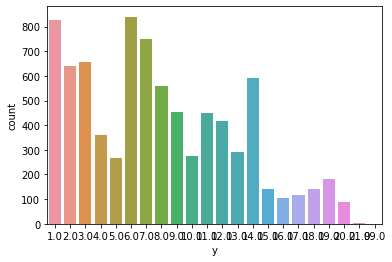

In [24]:
sns.countplot(df_y['y'])

In [25]:
#y값 묶음
y_feature = {
    1: [1.,2.,3.,4.,5.],
    2:[6.,7.,8.,9.,10.],
    3:[11.,12.,13.],
    4:[14.,15.,16.,17.],
    5:[18.,19.,20.]
            }
def change_y(x):
    for key, value in y_feature.items():
        for title in value:
            if x == title:
                return key
    return 0

#21, 22, 99 삭제 이거 잘못됨
df_y['y'] = df_y['y'].apply(lambda x: change_y(x))
df_y = df_y[df_y['y'] != 0] 

# 필요 없는 변수 제거
for column in range(1,23):  
    df_y = df_y.drop(["Q32A{:02d}".format(column)],axis=1)
#가구 월평균소득 99 제거 
df_y = df_y[df_y['가구월평균소득'] != 99]

# df_y.to_csv('./data/전처리완료_학력_라벨링.csv')
# df_y.to_csv('./data/전처리_2.csv')
df_y.to_csv('./data/EDA.csv')

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y', ylabel='count'>

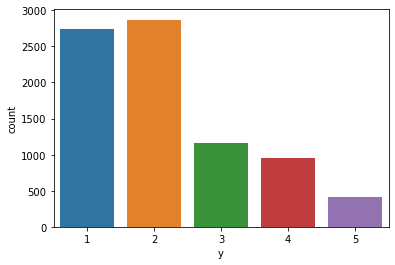

In [26]:
sns.countplot(df_y['y'])

In [27]:

df_y['직업'] = df_y['직업'].astype(int)
def yes_no(x):
    if x in[2.,3.]:
        return 2
    elif x in [4.,5]:
        return 3
    elif x in [6.,7.]:
        return 4
    else:
        return 1
    
def sum_4_5(x):
    if x == 2:
        return "디지털생활서비스"
    elif x == 3:
        return "디지털생활서비스"
    elif x == 4:
        return "디지털기술"
    elif x == 5:
        return "디지털기술"

    elif x == 1:
        return "컴퓨터기초"
    else :
        return 0
def job(x):
    if x == 14:
        return 0
#     elif x in [12,13]:
#         return 1
#     elif x == 11:
#         return 2
    else:
        return 1
df_2019_2020=df_y[df_y['년도'] != 2018]
df_2018 = df_y[df_y['년도'] == 2018]
df_2018['전반적인삶_만족도'] = df_2018['전반적인삶_만족도'].apply(lambda x: yes_no(x))
df_y = df_2019_2020.append(df_2018)
# df_y['전반적인삶_만족도'] = df_y['전반적인삶_만족도'].apply(lambda x: yes_no(x))

continuity = [
            'pc_노트북_보유','피처폰_보유','스마트폰_태블릿PC_보유','뉴스_날씨',
              '미디어콘텐츠','SNS','앱 검색 및 설치','온라인_교육_여부',
              '여가문화생활_만족도', '경제적_만족도', '건강상태_만족도', '전반적인삶_만족도'
             ]
#디지털 기기 접근성
df_y['디지털 기기 접근성'] = df_y['pc_노트북_보유']  + df_y['피처폰_보유'] + df_y['스마트폰_태블릿PC_보유']

#디지털 기기 접근성
df_y['디지털 기기 활용성'] = df_y['뉴스_날씨'] + df_y['미디어콘텐츠'] + df_y['SNS'] + df_y['앱 검색 및 설치'] +df_y['온라인_교육_여부']

df_y['만족도'] = df_y['여가문화생활_만족도'] + df_y['경제적_만족도'] +df_y['건강상태_만족도'] + df_y['전반적인삶_만족도']

df_y.drop(columns=continuity ,axis=1, inplace=True)

     
# df_y = df_y.drop_duplicates(keep ='last')
df_y['직업'] = df_y['직업'].apply(lambda x: job(x))

df_y['y'] = df_y['y'].apply(lambda x: sum_4_5(x))
df_y = df_y[df_y['y'] != 0] 

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [ ]:
# df_y_minmax =( df_y['연령'] - df_y['연령'].min() )/ (df_y['연령'].max() -df_y['연령'].min())
# df_y['연령'] = df_y_standard
# df_y = df_y[ (df_y['년도']==2018) | (df_y['년도'] == 2020)]
# 65세이상 데이터

del df_y['년도']
df_65 = df_y[(65 <= df_y['연령'])]
df_65.reset_index(drop = True, inplace = True)

#연령 범주화 하기
def old_range(x):
    if 65 <= x <70:
        return 5
    elif 70 <= x <75:
        return 4
    elif 75 <= x <80:
        return 3
    elif 80 <= x <85:
        return 2
    else:
        return 1

df_y_old_range = df_y.copy()
df_y_old_range['연령'] = df_y['연령'].apply(lambda x : old_range(x)).astype("float64")
df_65_old_range = df_65.copy()
df_65_old_range['연령'] = df_65['연령'].apply(lambda x : old_range(x)).astype("float64")

feature_columns = df_y.columns.difference(["y"]) # new_y를 제외한 모든 행


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y', ylabel='count'>

C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52980 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54504 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52488 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46356 missing from current

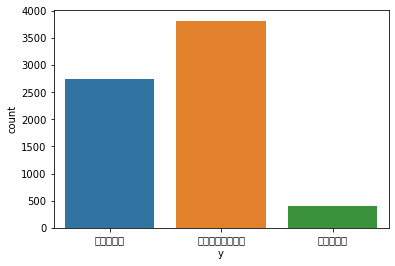

In [11]:
sns.countplot(df_y['y'])

IndexError: index 19 is out of bounds for axis 0 with size 19

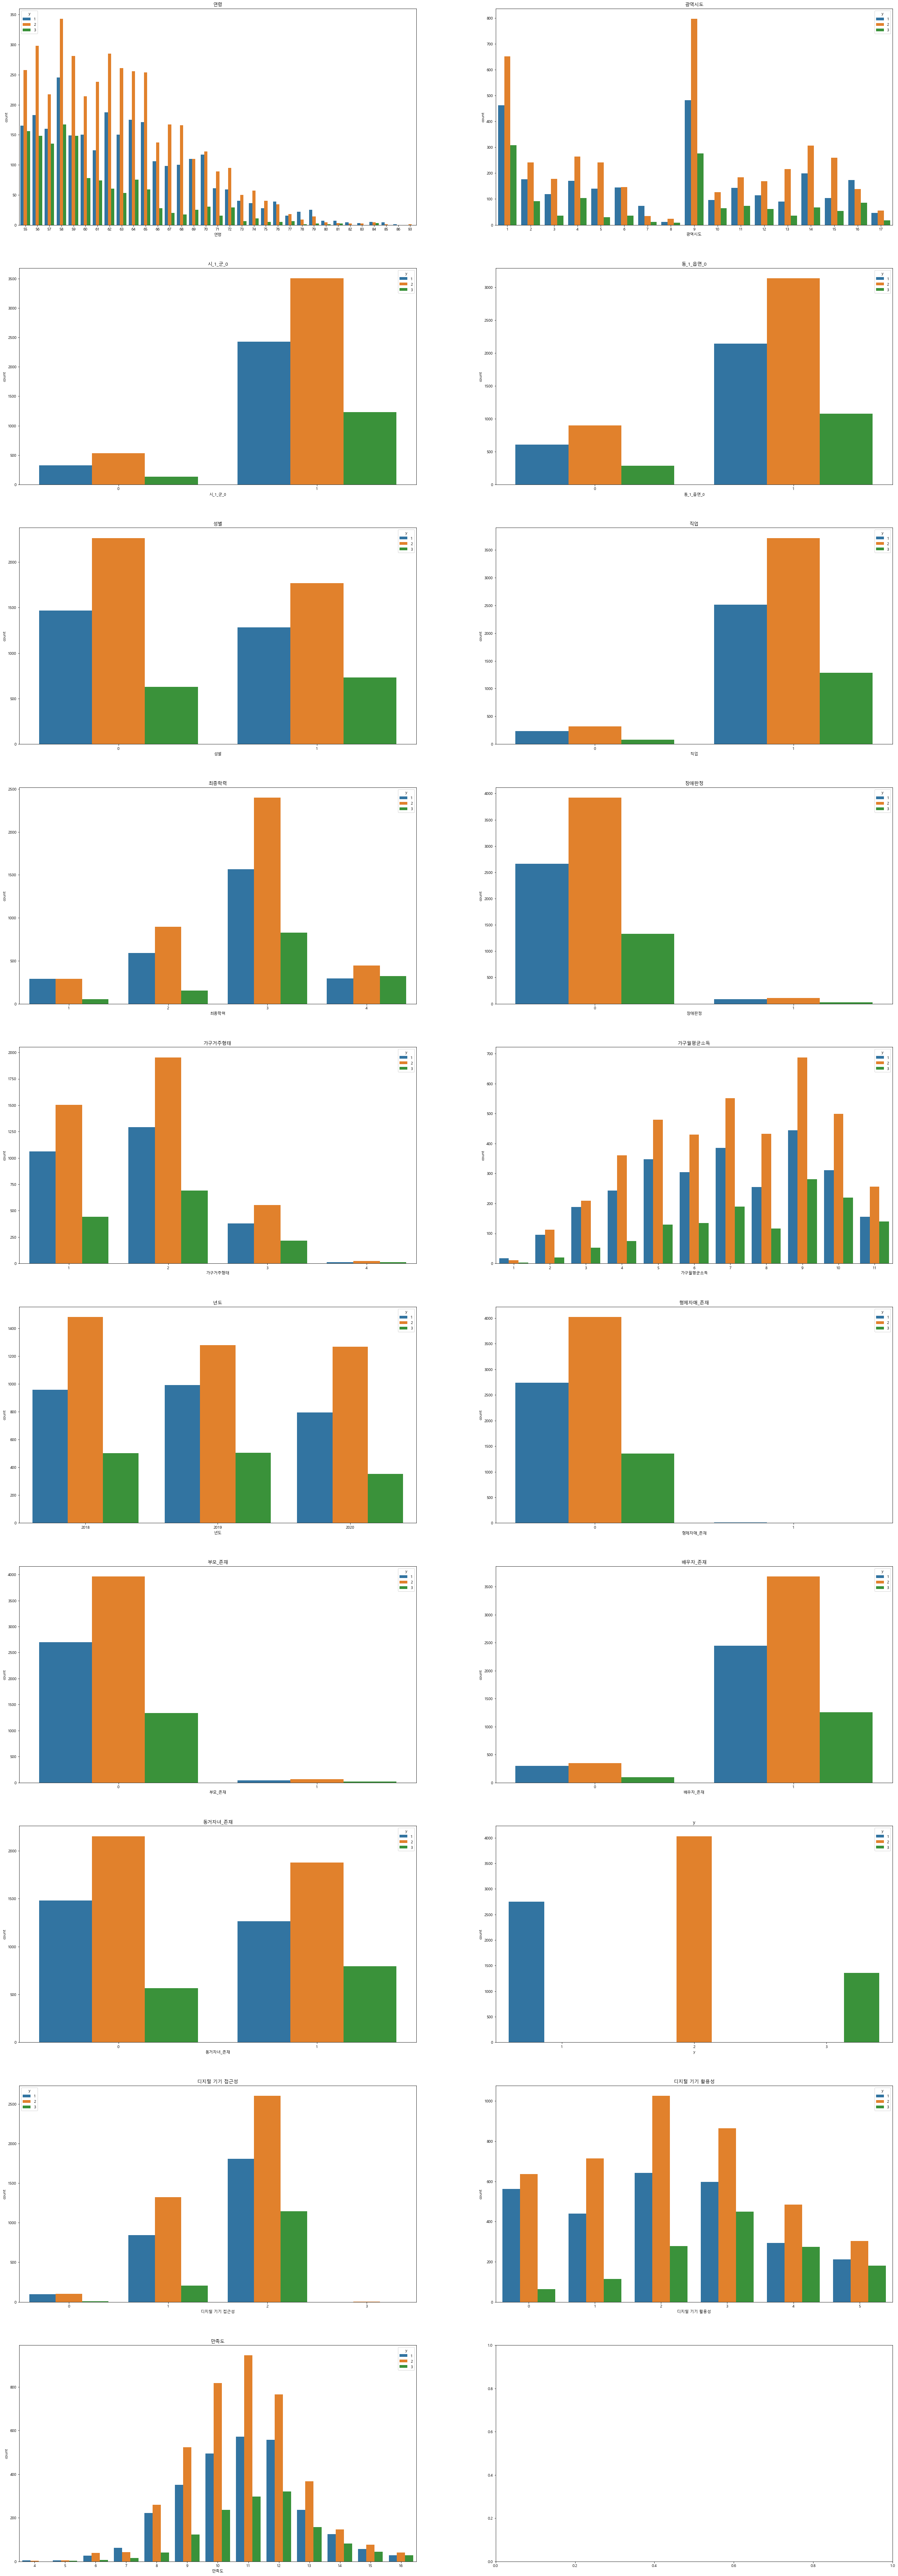

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = "Malgun Gothic"
fig, axes = plt.subplots(nrows=10,ncols=2)
fig.set_size_inches(40, 120)
k = 0 
for row in range(10):
    for col in range(2):
        col_name = df_y.columns[k]
        sns.countplot(data = df_y, x = col_name, hue = 'y', ax = axes[row][col])
        axes[row][col].set(ylabel = "count", title = col_name)
        k += 1

# 빼야 할거 
